In [1]:
import pandas as pd

# Read All Data
train = pd.read_parquet("traindata.parquet")
train_Y = train["Labels"]
train_X = train.drop(columns=["Labels"], inplace=False)
val = pd.read_parquet("valdata.parquet")
val_X = val.drop(columns=["Labels"], inplace=False)
test = pd.read_parquet("testdata.parquet")
test_X = test.drop(columns=["Labels"], inplace=False)

In [2]:
from sklearn.preprocessing import normalize
train_X = normalize(train_X)
val_X = normalize(val_X)
test_X = normalize(test_X)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for n in range(1, 15):
    err = 0
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(train_X, train_Y)
    val_pred = neigh.predict(val_X)
    for pred, actual in zip(val_pred, val["Labels"].values):
        if pred != actual:
            err += 1
    print(err / len(val))
    error_rates.append(err/len(val))

0.3209054593874834
0.3521970705725699
0.3015978695073236
0.3155792276964048
0.3015978695073236
0.29760319573901467
0.3015978695073236
0.303595206391478
0.30492676431424764
0.3055925432756325
0.30692410119840213
0.3009320905459387
0.303595206391478
0.303595206391478


Text(0.5, 1.0, 'K Neighbours Classifier')

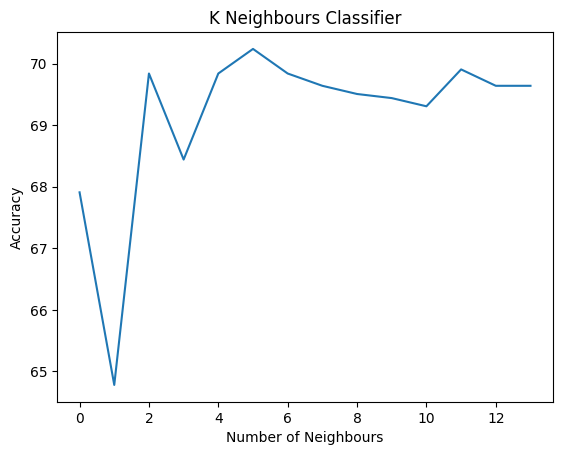

In [9]:
import matplotlib.pyplot as plt

accuracy = [(1 - error_rate)*100 for error_rate in error_rates]

plt.plot(accuracy)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.title("K Neighbours Classifier")

In [10]:
# 5 was the optimal number of neighbours
neigh = KNeighborsClassifier(5)
neigh.fit(train_X, train_Y)
errors = 0
test_pred = neigh.predict(test_X)
for pred, actual in zip(test_pred, test["Labels"].values):
    if pred != actual:
        errors += 1

error_rates = errors / len(test)
accuracy = ( 1 - error_rates ) * 100

print(f"Test Dataset Accuracy {accuracy:.2f}%")

Test Dataset Accuracy 69.00%
